In [1]:
import pandas as pd

from scipy.stats import pearsonr
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("D02_Boston.xlsx")

# Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# 1https://archive.ics.uci.edu/ml/datasets/Housing
# 123
# 20.2. Load the Dataset 124
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to ﬁve Boston employment centers
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s
# We can see that the input attributes have a mixture of units.

In [3]:
data = data.iloc[:,1:]
# Remove index column

In [4]:
columns = data.columns

print("Available columns:")
print(columns)

Available columns:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


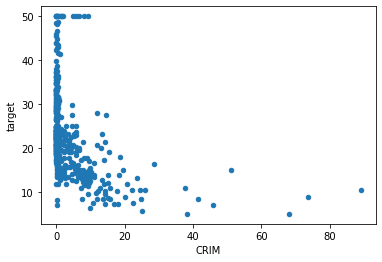

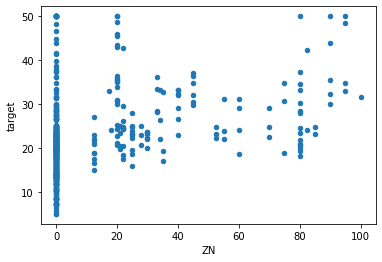

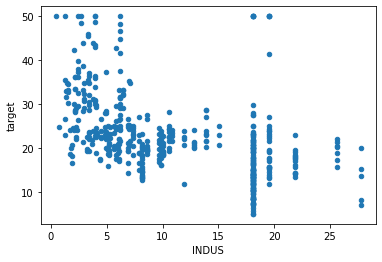

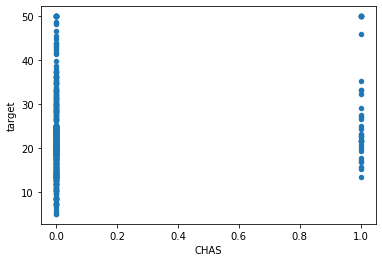

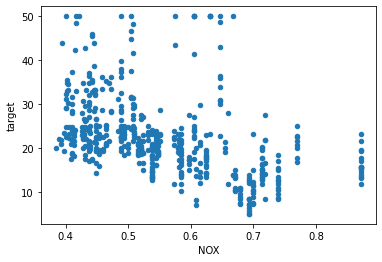

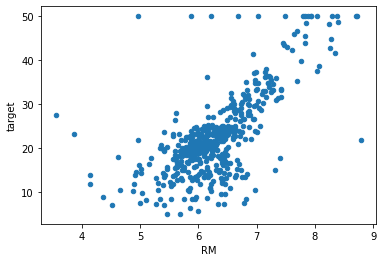

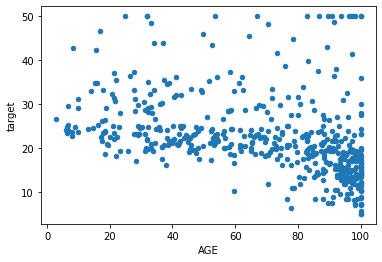

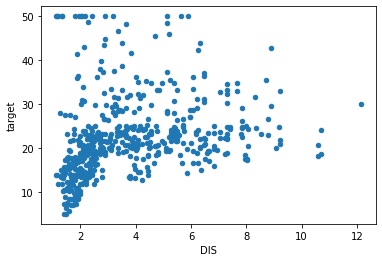

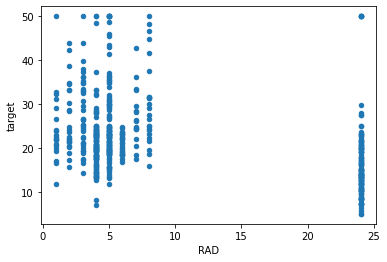

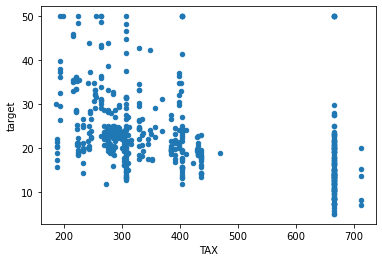

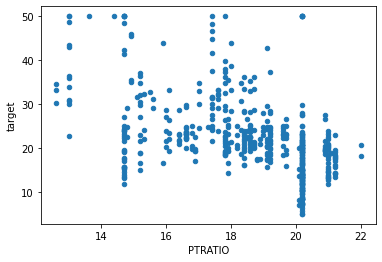

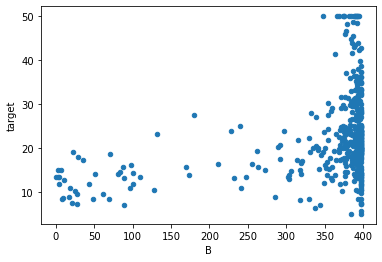

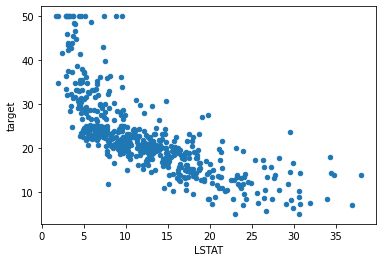

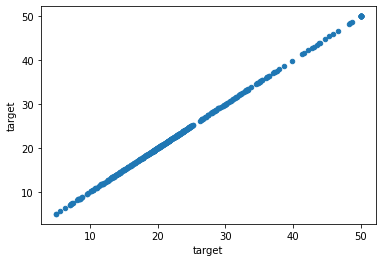

In [5]:
for col in columns:
    data.plot.scatter(x=col,y='target')

In [6]:
# Check correlation between attributes and target

candidates = []
for col in columns:
    pearson = pearsonr(data[col],data['target'])[0]
    print('%10s = %6.3f' % ( col , pearson) )
    
    if not (abs(pearson) < 0.4):
        candidates.append(col)

candidates.remove('target')
print("Candidates to selection:", candidates)

      CRIM = -0.386
        ZN =  0.360
     INDUS = -0.484
      CHAS =  0.175
       NOX = -0.427
        RM =  0.695
       AGE = -0.377
       DIS =  0.250
       RAD = -0.382
       TAX = -0.469
   PTRATIO = -0.508
         B =  0.333
     LSTAT = -0.738
    target =  1.000
Candidates to selection: ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


In [7]:
# Ideal: Use attributes that have strong correlation with target and weak correlation between ohter attributes
# Find correlation between attributes:
discard = []
for attr1 in candidates:
    for attr in candidates:
        pearson = pearsonr(data[attr1],data[attr])[0]
        print('%10s = %6.3f' % (
            attr1+'_'+attr,
            pearson ) )
        
        if abs(pearson) > 0.7 and attr != attr1:
            if (abs(pearsonr(data[attr1],data['target'])[0]) < abs(pearsonr(data[attr],data['target'])[0])):
                if attr1 not in discard: discard.append(attr1)
            else: 
                if attr not in discard: discard.append(attr)

    print("------------------------")

for attr in discard:
    candidates.remove(attr)
print("Discarted attributes:",discard)
print("New candidates: ", candidates)  

INDUS_INDUS =  1.000
 INDUS_NOX =  0.764
  INDUS_RM = -0.392
 INDUS_TAX =  0.721
INDUS_PTRATIO =  0.383
INDUS_LSTAT =  0.604
------------------------
 NOX_INDUS =  0.764
   NOX_NOX =  1.000
    NOX_RM = -0.302
   NOX_TAX =  0.668
NOX_PTRATIO =  0.189
 NOX_LSTAT =  0.591
------------------------
  RM_INDUS = -0.392
    RM_NOX = -0.302
     RM_RM =  1.000
    RM_TAX = -0.292
RM_PTRATIO = -0.356
  RM_LSTAT = -0.614
------------------------
 TAX_INDUS =  0.721
   TAX_NOX =  0.668
    TAX_RM = -0.292
   TAX_TAX =  1.000
TAX_PTRATIO =  0.461
 TAX_LSTAT =  0.544
------------------------
PTRATIO_INDUS =  0.383
PTRATIO_NOX =  0.189
PTRATIO_RM = -0.356
PTRATIO_TAX =  0.461
PTRATIO_PTRATIO =  1.000
PTRATIO_LSTAT =  0.374
------------------------
LSTAT_INDUS =  0.604
 LSTAT_NOX =  0.591
  LSTAT_RM = -0.614
 LSTAT_TAX =  0.544
LSTAT_PTRATIO =  0.374
LSTAT_LSTAT =  1.000
------------------------
Discarted attributes: ['NOX', 'TAX']
New candidates:  ['INDUS', 'RM', 'PTRATIO', 'LSTAT']


In [8]:
for attr in data.columns:
    if attr not in candidates and attr != 'target':
        data.drop(attr, inplace=True, axis=1)

x = data.iloc[:,0:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
    


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 200,
    random_state = 2308   
    )

In [10]:
# Train a linear regressor

linear_regressor = LinearRegression(normalize=True)

linear_regressor = linear_regressor.fit(x_train,y_train)

In [11]:
y_answer_train = linear_regressor.predict(x_train)
y_answer_test  = linear_regressor.predict(x_test)

In [12]:
# Calculate metrics and compare result

print(' ')
print(' LINEAR REGRESSOR:')
print(' ')

print('  Metric  INSIDE sample      OUTSIDE sample ')
print(' -------  -----------------  ---------------')

mse_in  = mean_squared_error(y_train,y_answer_train)
rmse_in = math.sqrt(mse_in)
r2_in   = r2_score(y_train,y_answer_train)

mse_out  = mean_squared_error(y_test,y_answer_test)
rmse_out = math.sqrt(mse_out)
r2_out   = r2_score(y_test,y_answer_test)

print(' %7s  %17.4f  %15.4f' % (  'mse' ,  mse_in ,  mse_out ) )
print(' %7s  %17.4f  %15.4f' % ( 'rmse' , rmse_in , rmse_out ) )
print(' %7s  %17.4f  %15.4f' % (   'r2' ,   r2_in ,   r2_out ) )

 
 LINEAR REGRESSOR:
 
  Metric  INSIDE sample      OUTSIDE sample 
 -------  -----------------  ---------------
     mse            25.0691          30.3432
    rmse             5.0069           5.5085
      r2             0.6891           0.6635


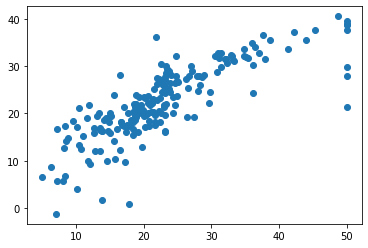

In [13]:
plt.scatter(x=y_test,y=y_answer_test)